In [13]:
%config Completer.use_jedi = False

# Ex1:
## Viết hàm có tên là show_stars(rows). Nếu rows là 5, nó sẽ hiện như sau:

In [14]:
def show_stars(rows):
    if rows <= 0:
        return ' '
    rows > 0 
    for i in range (1, rows+1):
        star = '*'*i
        print(star)

In [15]:
rows = 5
show_stars(rows)

*
**
***
****
*****


# Ex2:
### Giả sử bạn đang đứng ở tầng trệt (tầng 0) ở tòa nhà 100 tầng. Bạn có 1 con xúc sắc 6 mặt.
### Bạn được đặt cược rằng nếu bạn đi được lên tầng 60 trở lên là bạn thắng. Cách đi như sau:
### Nếu tung xúc sắc lên:
```
- Nếu mặt trên cho ra số chấm tròn là 1 hoặc 2 thì bạn đi xuống 1 tầng.
- Nếu mặt trên cho ra số chấm tròn từ 3 đến 5 thì bạn đi lên 1 tầng.
- Nếu mặt trên cho ra số chấm tròn là 6 thì bạn sẽ được tung xúc sắc lại 1 lần nữa, ra bao nhiêu
số chấm tròn thì đi lên bấy nhiêu tầng cho lần đi đó.
```
### Bạn được đi lên 100 lần.
### Chú ý:
```
- Vì 1 lý do gì đó, bạn có khả năng phải đi xuống tầng trệt để đi lại. Khả năng này 0.1%.
- Không có tầng âm, nghĩa là nếu rơi vào số chấm tròn là 1 hoặc 2 mà bạn đang ở tầng
trệt rồi thì bạn sẽ được ở tầng trệt cho lần đi đó.
- Giả định thêm: Xúc sắc bình thường. Bạn được chơi game này bao nhiêu lần tùy điều
kiện của bạn.
```
### Tính xác suất thắng cuộc là bao nhiêu?

# Ex3:

## 1. Lấy dữ liệu trong file Names.zip đính kèm Dùng Pandas đọc và tổng hợp dữ liệu của các năm

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# import tất cả các file:
import_names = [] 
for i in range(1880, 2019):
    import_names.append(pd.read_csv(f'yob{i}.txt',
                               names = ['name', 'sex', 'number', 'year']))
    import_names[-1]['year'] = i

In [18]:
# Tổng hợp dữ liệu tất cả các năm vào 1 DataFrame
names = pd.concat(import_names)
names

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


In [19]:
names.shape

(1957046, 4)

In [20]:
# Đặt lại số thứ tự các dòng
names.index = [i for i in range(1, names.shape[0]+1)]

In [21]:
names

,name,sex,number,year
1,Mary,F,7065,1880
2,Anna,F,2604,1880
3,Emma,F,2003,1880
4,Elizabeth,F,1939,1880
5,Minnie,F,1746,1880
...,...,...,...,...
1957042,Zylas,M,5,2018
1957043,Zyran,M,5,2018
1957044,Zyrie,M,5,2018
1957045,Zyron,M,5,2018


In [22]:
# Lập bảng tổng hợp tên theo giới tính qua các năm:
names.pivot_table('number', ['name', 'sex'], 'year', 'sum', fill_value=0) 

,year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
name,sex,,,,,,,,,,,,,,,,,,,,,
Aaban,M,0,0,0,0,0,0,0,0,0,0,...,6,9,11,11,14,16,15,9,11,7
Aabha,F,0,0,0,0,0,0,0,0,0,0,...,0,0,7,5,0,9,7,7,0,0
Aabid,M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,6
Aabidah,F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
Aabir,M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,M,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
Zyvon,M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,0
Zyyanna,F,0,0,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,0


## 2. Vẽ biểu đồ tổng số trẻ em sinh ra theo giới tính và năm (Total births by sex and year)

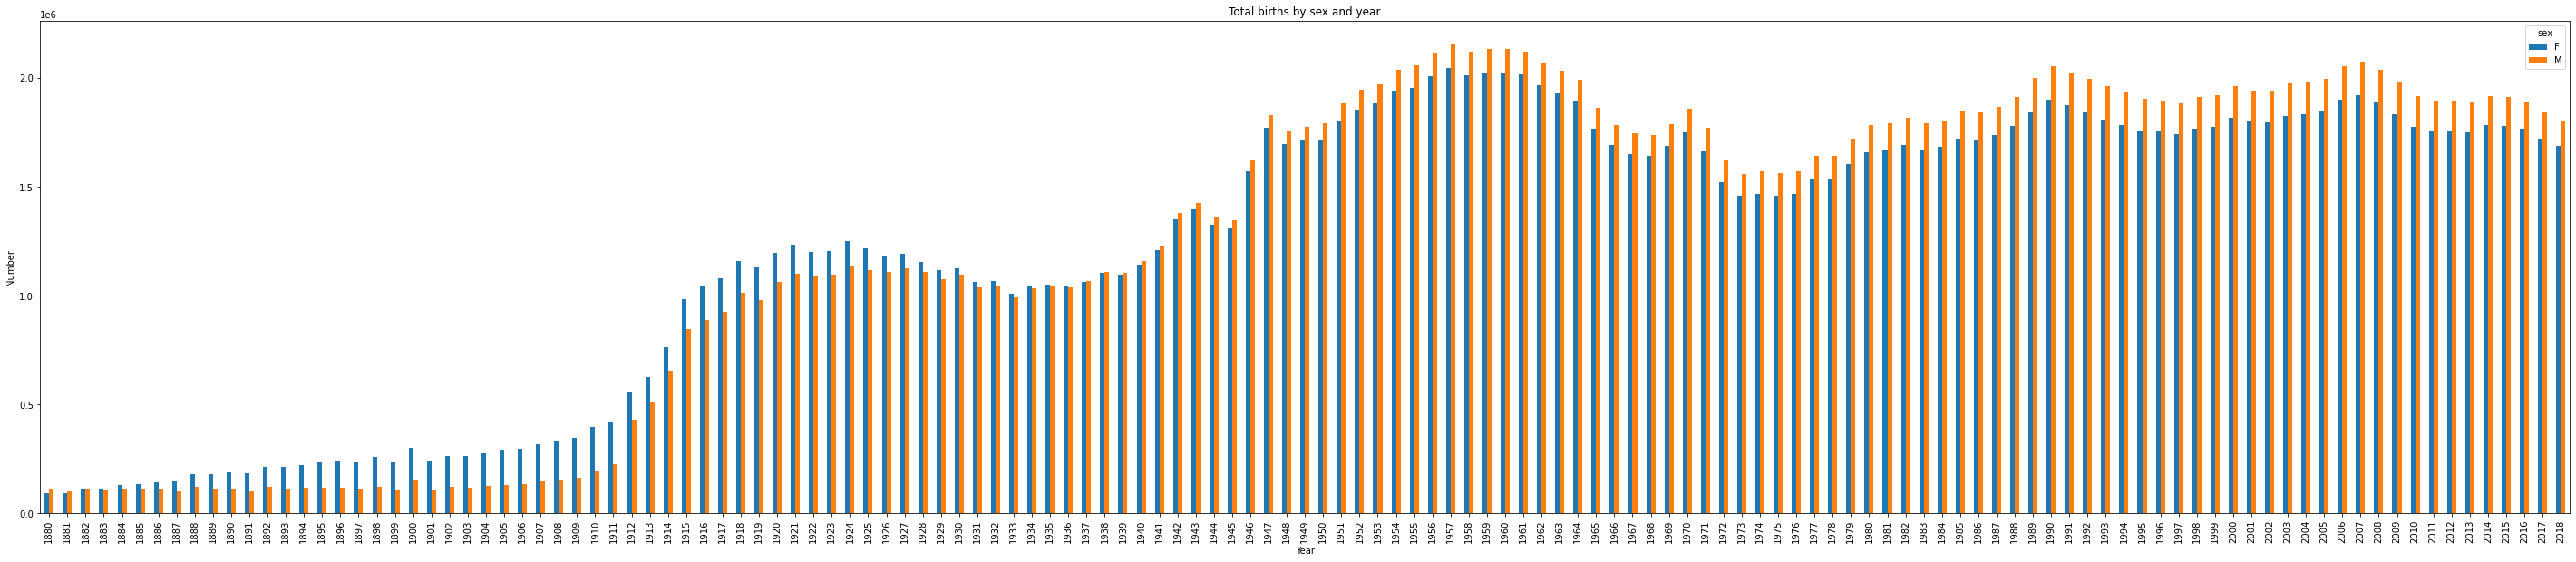

In [23]:
names.pivot_table(values = 'number', index = 'year', columns = 'sex', aggfunc = 'sum')\
.plot(kind = 'bar',xlabel='Year', ylabel='Number', title = 'Total births by sex and year', figsize = (50,10));

## 3. Tạo subset gồm top 1000 cái tên phổ biến mỗi năm theo từng loại giới tính

In [24]:
# Sắp xếp lại DataFrame theo chiều giảm dần của số lượng tên mỗi năm:
data_3 = names.sort_values(by = ['year', 'number'], ascending = [True, False])

In [25]:
# Tạo vòng lặp để lấy ra 1000 giá trị đầu tiên của mỗi năm:
subset = pd.DataFrame()
for i in range (1880, 2019):
    subset = subset.append(data_3[data_3.year == i].head(1000))

In [26]:
subset

,name,sex,number,year
943,John,M,9655,1880
944,William,M,9532,1880
1,Mary,F,7065,1880
945,James,M,5927,1880
946,Charles,M,5348,1880
...,...,...,...,...
1925527,Collins,F,604,2018
1943525,Royal,M,604,2018
1925528,Imani,F,603,2018
1925529,Meadow,F,602,2018


## 4. Vẽ biểu đồ số lượng các bé sinh theo năm có các tên sau: Philip, Harry, Elizabeth, Marilyn

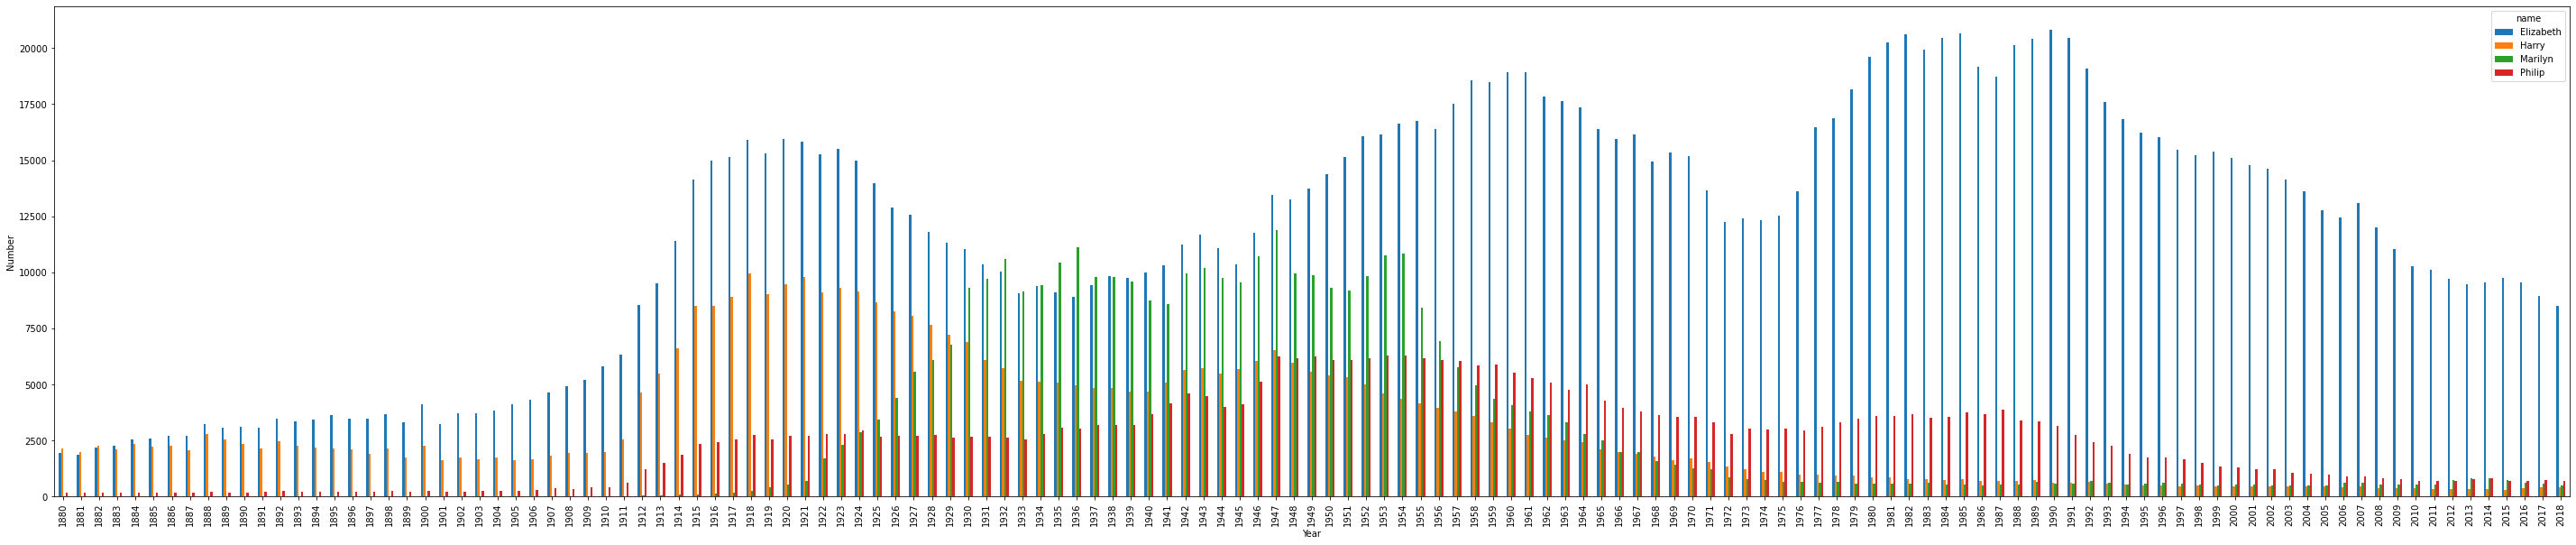

In [27]:
# Dùng pivot_table
names.query("name in ['Philip', 'Harry', 'Elizabeth', 'Marilyn']").\
pivot_table(values = 'number', index = 'year', columns = 'name', aggfunc = 'sum')\
.plot(kind = 'bar', xlabel='Year', ylabel='Number', figsize = (50,10));

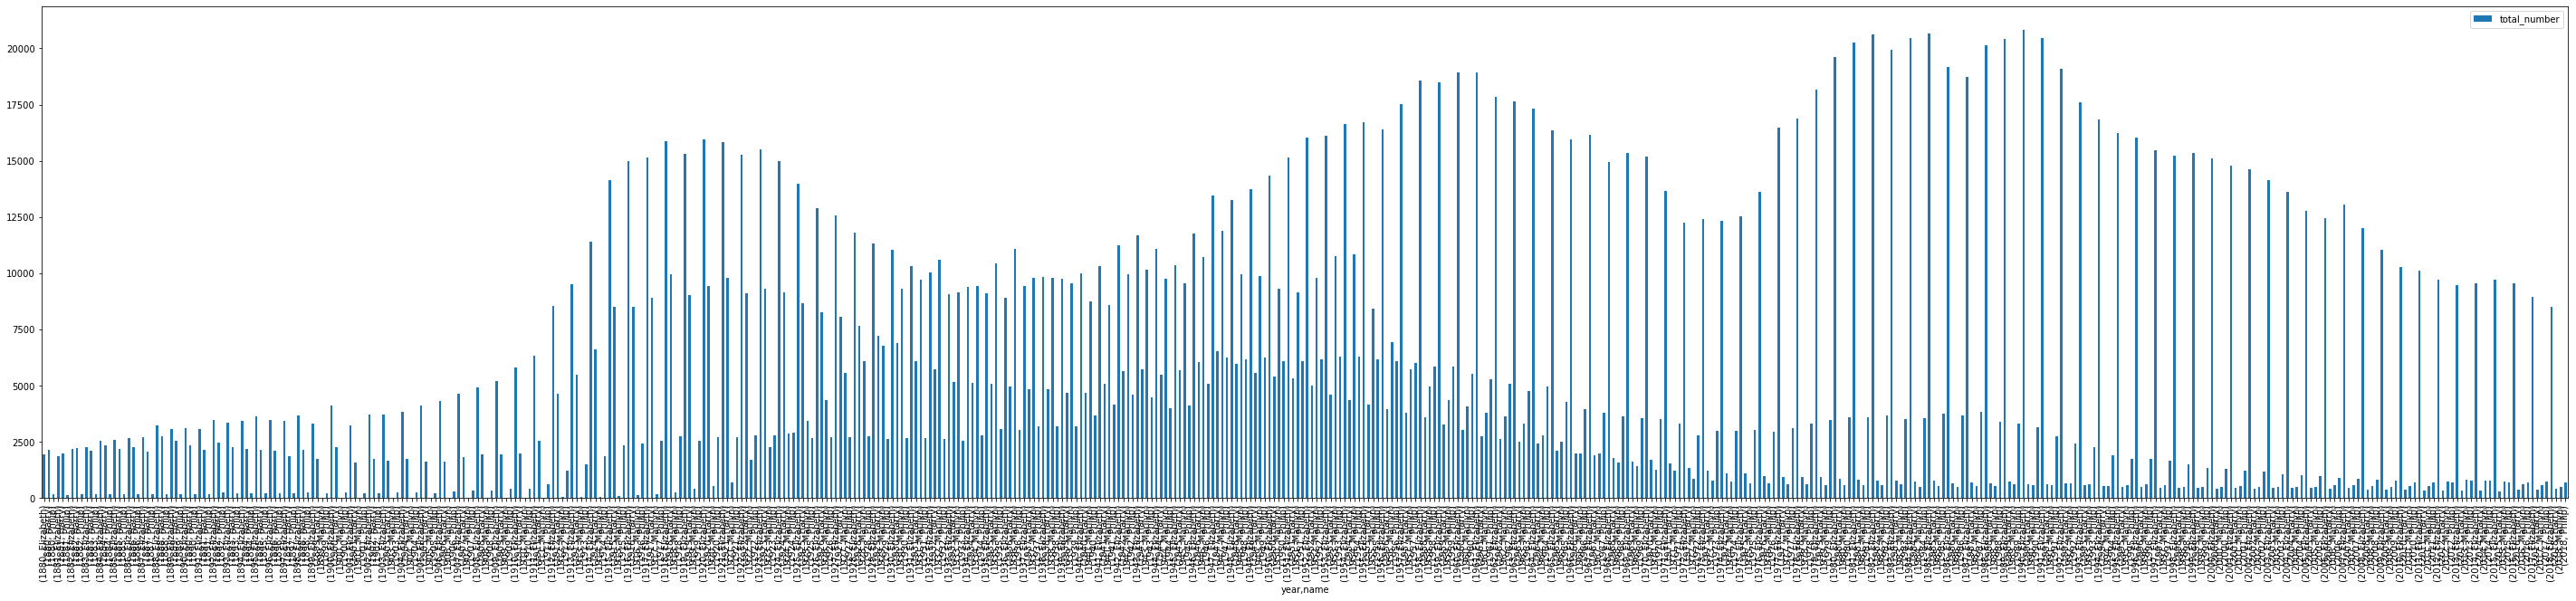

In [28]:
# Dùng Group by cho dễ hình dung bản chất của pivot
names.query("name in ['Philip', 'Harry', 'Elizabeth', 'Marilyn']").groupby(['year', 'name']).agg(total_number =('number', 'sum')).\
plot(kind = 'bar', figsize = (50,10));

## 5. Vẽ biểu đồ thể hiện sự đa dạng trong việc đặt tên qua các năm theo từng giới tính (thể hiện bằng xu hướng giảm dần từng năm của tổng tỷ lệ % của top 1000 tên phổ biến)

In [29]:
# Thống kê: tổng số lượng trẻ của top 1000 tên phổ biến theo năm
left = subset.groupby(['year', 'sex']).agg(number_top1000 = ('number', 'sum')).reset_index()

In [30]:
# Thống kê: tổng số lượng trẻ theo năm
right = names.groupby(['year', 'sex']).agg(number_all = ('number', 'sum')).reset_index()

In [31]:
# Merge 2 DataFrame lại với nhau bằng 2 cột: 'year' & 'sex'
merge = left.merge(right, on = ['year', 'sex'], how = 'inner')

In [32]:
# Tạo thêm cột % (top100 / all)
merge['percentage'] = merge['number_top1000'] / merge['number_all']
merge

,year,sex,number_top1000,number_all,percentage
0,1880,F,87657,90994,0.963327
1,1880,M,106343,110490,0.962467
2,1881,F,88750,91953,0.965167
3,1881,M,97091,100743,0.963749
4,1882,F,103834,107847,0.962790
...,...,...,...,...,...
273,2016,M,1406190,1891585,0.743392
274,2017,F,1085851,1719138,0.631625
275,2017,M,1356779,1842837,0.736245
276,2018,F,1063256,1686961,0.630279


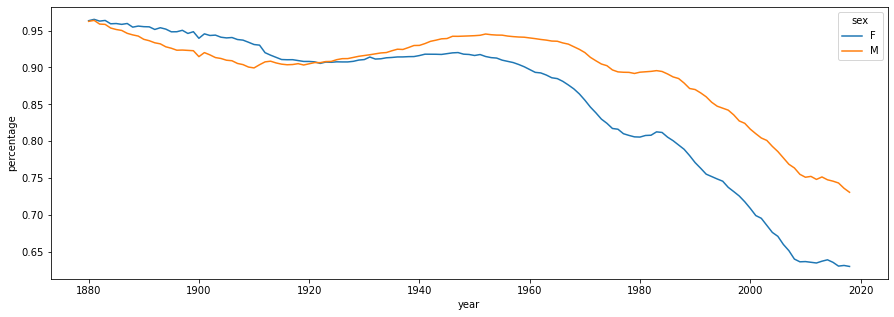

In [68]:
# Vẽ biểu đồ:
plt.figure(figsize=(15, 5))
sns.lineplot(data= merge, x='year', y='percentage', hue = 'sex');

## 6. Vẽ biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam và nữ qua các năm 1900, 1960 và 2018

In [34]:
# tại sao 2 câu query lại ra kết quả khác nhau???
names.query("year in [1900, 1960, 2018]") # kết quả sai
names.query("year == 1990 or year == 1960 or year == 2018") # kết quả đúng

,name,sex,number,year
572472,Mary,F,51475,1960
572473,Susan,F,39203,1960
572474,Linda,F,37311,1960
572475,Karen,F,36380,1960
572476,Donna,F,34132,1960
...,...,...,...,...
1957042,Zylas,M,5,2018
1957043,Zyran,M,5,2018
1957044,Zyrie,M,5,2018
1957045,Zyron,M,5,2018


In [35]:
# Lấy ra dữ liệu năm 1990, 1960 và 2018
data = names.query("year == 1990 or year == 1960 or year == 2018")

In [36]:
# Tạo hàm để lấy ra chữ cái đầu tiên của tên
first_letter = lambda x: x[0]

In [37]:
# Áp dụng hàm vào DataFrame để thay thế cột tên bằng chữ cái đầu tiên của tên
data['name'] = data.name.apply(first_letter)

/Users/tuanhpham/opt/anaconda3/envs/tuanh/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 6.a.Biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nữ qua các năm 1900, 1960 và 2018

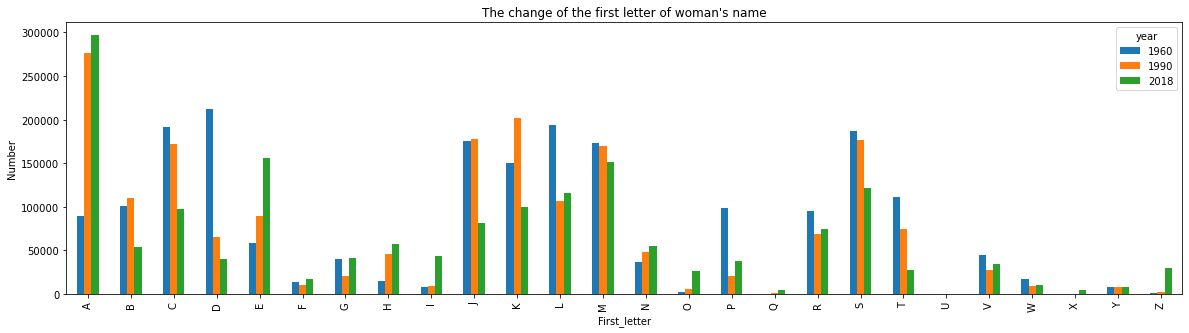

In [38]:
data.query('sex=="F"').pivot_table('number', 'name', 'year', 'sum').plot(kind='bar',
                                                                         xlabel='First_letter', 
                                                                         ylabel='Number', 
                                                                         title= "The change of the first letter of woman's name",
                                                                         figsize=(20,5));

### 6.b.Biểu đồ thể hiện sự thay đổi trong cách đặt chữ cái đầu tiên trong tên của nam qua các năm 1900, 1960 và 2018

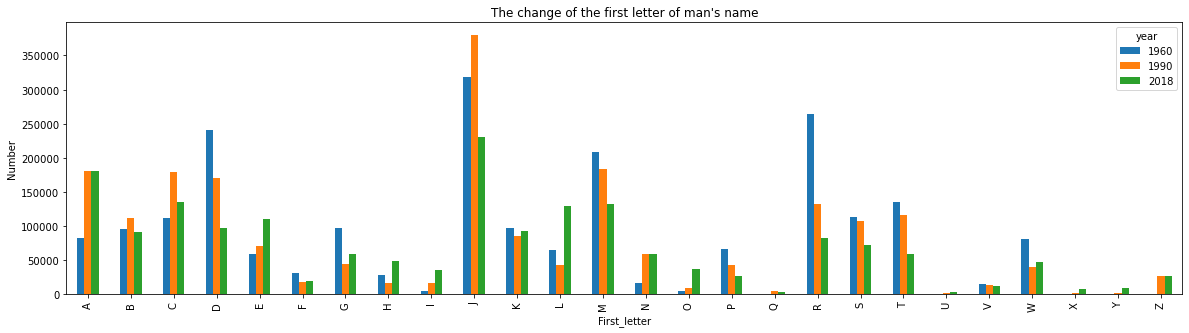

In [39]:
data.query('sex=="M"').pivot_table('number', 'name', 'year', 'sum').plot(kind='bar',
                                                                         xlabel='First_letter', 
                                                                         ylabel='Number', 
                                                                         title= "The change of the first letter of man's name",
                                                                         figsize=(20,5));

## 7. Xác định xu hướng tên con trai biến thành tên con gái và ngược lại. Lấy ví dụ tên có chữ “Lesl…” Ban đầu nam đặt nhiều sau đó giảm, nữ ngược lại.

In [40]:
# Thống kê số lượng từng tên theo năm:
all_names = names.groupby(['year', 'name']).agg(total_number = ('number', 'sum')).reset_index()

In [41]:
# Sắp xếp lại bảng name để dùng làm bảng trái khi merge cho dễ quan sát:
names_sorted = names.sort_values(by = ['year', 'name'], ascending = True)

In [42]:
# Merge 2 DataFrame lại với nhau bằng 2 cột: 'name' & 'year'
merge_2 = names_sorted.merge(all_names, on = ['name', 'year'], how = 'outer')

In [63]:
# Tạo thêm cột tỉ lệ %:
merge_2['percentage'] = merge_2['number'] / merge_2['total_number']

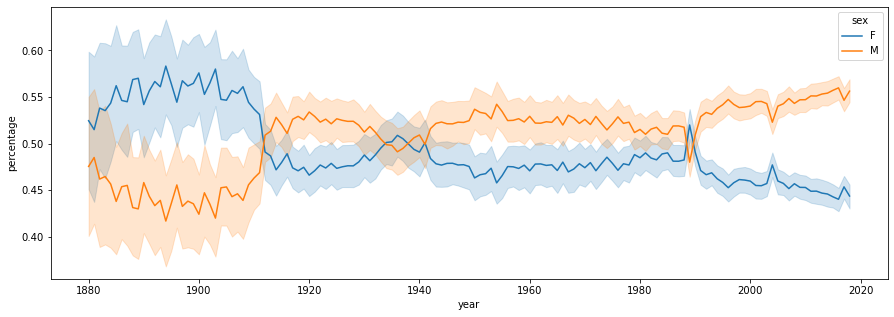

In [73]:
# Vẽ biểu đồ:
plt.figure(figsize=(15, 5))
sns.lineplot(data= merge_2.query('percentage != 1'), x='year', y='percentage', hue = 'sex');